In [1]:
pip install noisereduce 

  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7608 sha256=6705c8bb5c6ea3b9b12aed916fd897ce668b76e12532b08215d0da25095fde32
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


In [2]:
pip install librosa

In [3]:
pip install MIDIUtil

     |████████████████████████████████| 1.0MB 2.5MB/s 
  Created wheel for MIDIUtil: filename=MIDIUtil-1.2.1-cp36-none-any.whl size=54570 sha256=73c4e0e9038d17d798cb834e532d9f0e207602866a984244627e1c025aa56440
  Stored in directory: /root/.cache/pip/wheels/70/f1/24/97bde012f64820632e1e5e2935df19dfbcf9e058b0734b57cd
Successfully built MIDIUtil


In [43]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import IPython
%matplotlib inline
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('/content/drive/My Drive/audio_atributes/monochannel_GunsNRoses-SweetChildOMineIntro.wav')

In [44]:
IPython.display.Audio(rate=samplerate,data=data)

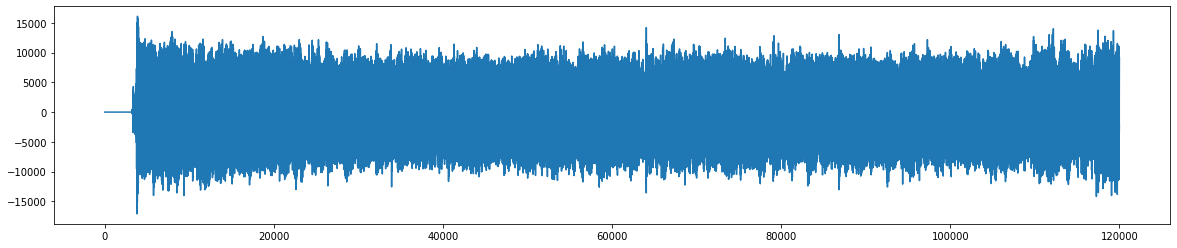

In [45]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

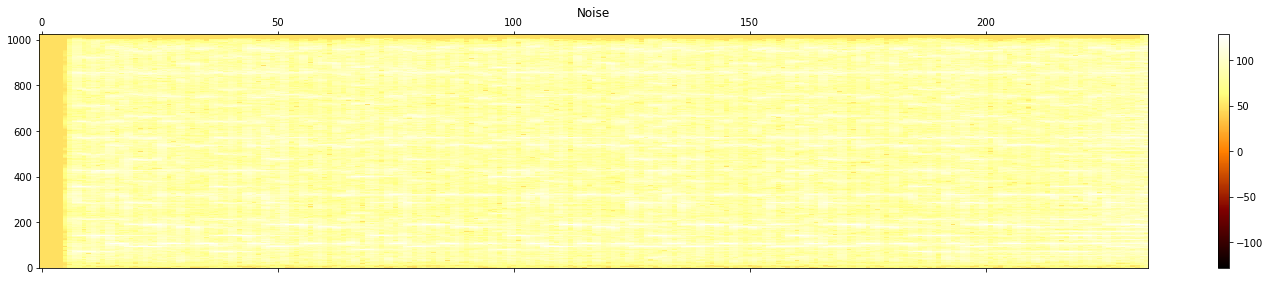

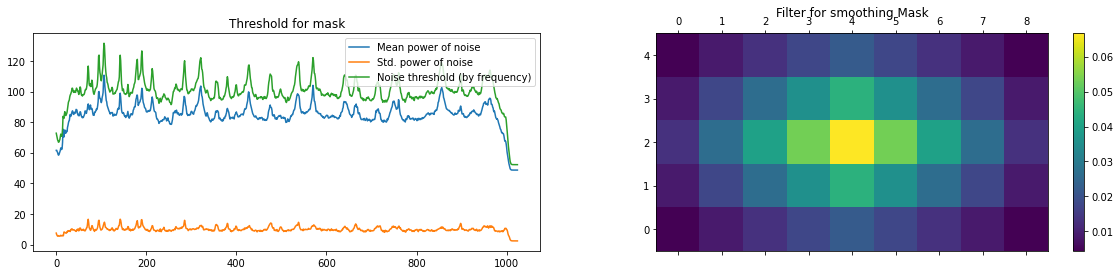

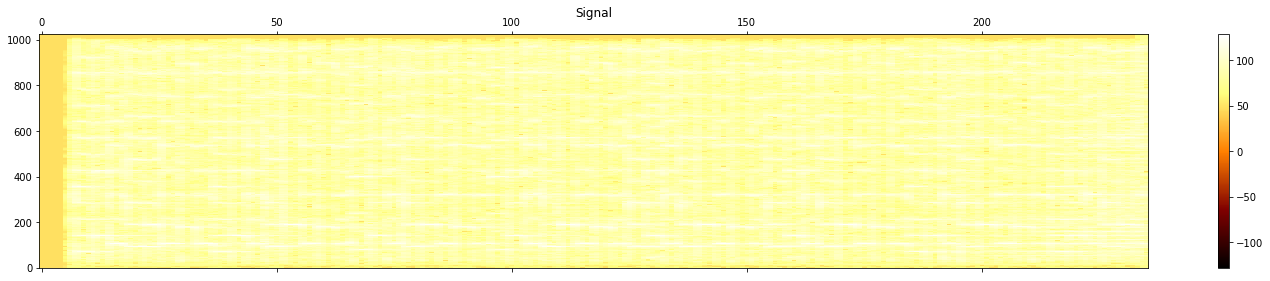

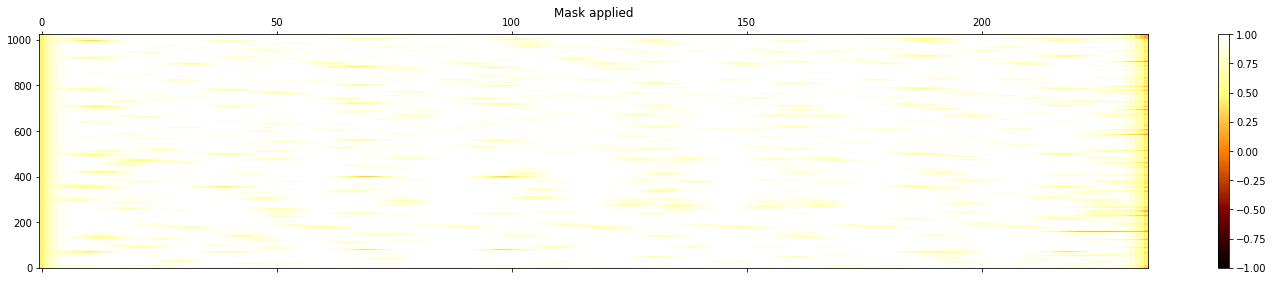

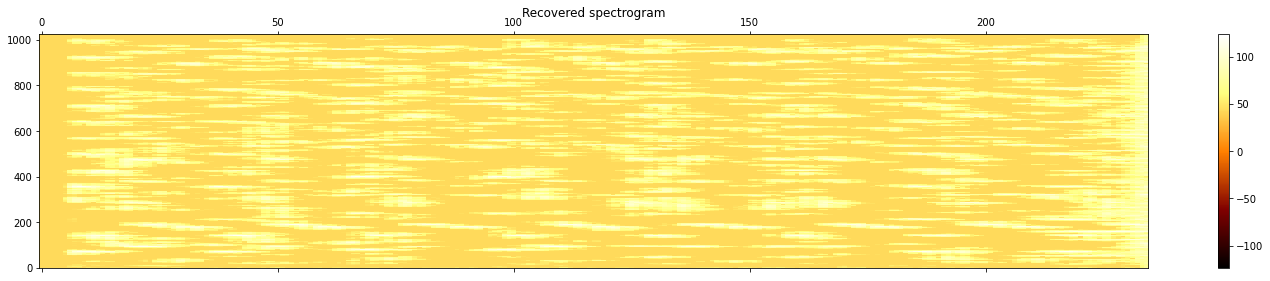

In [46]:
import noisereduce as nr
# load data
# select section of data that is noise
data=data/1.0
noisy_part = data

# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)

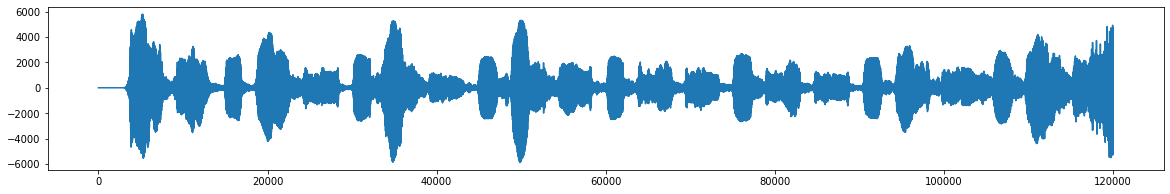

In [47]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [48]:
IPython.display.Audio(rate=samplerate, data= reduced_noise)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


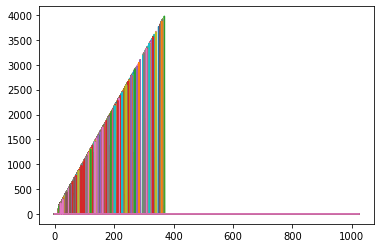

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 

import librosa as lr


audio='drive/My Drive/audio_atributes/canonrock_music'

y, sr = lr.load('./{}.wav'.format(audio))
pitches, magnitudes = lr.piptrack(y=y, sr=sr)
print(pitches)
print('///')
print(magnitudes)
plt.plot(pitches)
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


[135.99917763]


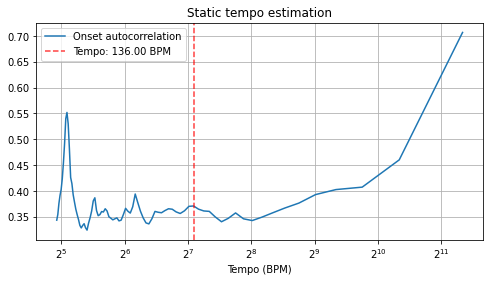

In [51]:
onset_env = lr.onset.onset_strength(y, sr=sr)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = lr.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lr.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lr.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()